# Charlotte SDS: Basketball Assessment

## Preliminary Data Gathering & Cleaning

In [1]:
#Get the Pelicans team_id
from nba_api.stats.static import teams

nba_teams = teams.get_teams()

pelicans = [team for team in nba_teams if team['abbreviation'] == 'NOP'][0]
pelicans_id = pelicans['id']
print(f'pelicans_id: {pelicans_id}')

pelicans_id: 1610612740


In [2]:
from nba_api.stats.endpoints import leaguegamefinder

# Query for Pelicans games
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=pelicans_id)

games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22020,1610612740,NOP,New Orleans Pelicans,0022001072,2021-05-16,NOP vs. LAL,L,241,98,...,0.714,8,39,47,26,4,5,21,18,-12.0
1,22020,1610612740,NOP,New Orleans Pelicans,0022001059,2021-05-14,NOP @ GSW,L,241,122,...,0.679,12,39,51,21,6,3,9,23,-3.0
2,22020,1610612740,NOP,New Orleans Pelicans,0022000154,2021-05-12,NOP @ DAL,L,241,107,...,0.737,11,33,44,18,5,2,12,18,-18.0
3,22020,1610612740,NOP,New Orleans Pelicans,0022001028,2021-05-10,NOP @ MEM,L,241,110,...,0.667,14,36,50,29,9,4,12,18,-5.0
4,22020,1610612740,NOP,New Orleans Pelicans,0022001020,2021-05-09,NOP @ CHA,W,240,112,...,0.455,16,35,51,26,11,9,16,20,2.0


In [3]:
# Look for games against Portland

games_vs_por = games[games.MATCHUP.str.contains('POR')]
games_vs_por.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
31,22020,1610612740,NOP,New Orleans Pelicans,0022000629,2021-03-18,NOP @ POR,L,239,93,...,0.680,10,34,44,24,6,5,12,19,-8.0
32,22020,1610612740,NOP,New Orleans Pelicans,0022000614,2021-03-16,NOP @ POR,L,239,124,...,0.800,10,31,41,38,8,3,16,24,-1.0
44,22020,1610612740,NOP,New Orleans Pelicans,0022000441,2021-02-17,NOP vs. POR,L,240,124,...,0.793,18,33,51,25,5,1,11,15,-2.0
93,22019,1610612740,NOP,New Orleans Pelicans,0021900834,2020-02-21,NOP @ POR,W,240,128,...,0.606,9,37,46,36,8,3,17,23,13.0
95,22019,1610612740,NOP,New Orleans Pelicans,0021900804,2020-02-11,NOP vs. POR,W,240,138,...,0.813,14,36,50,40,7,5,13,20,21.0


In [4]:
# Filter for game_id of New Orleans vs. Portland on Feb 27, 2021

game_id = games_vs_por.loc[games_vs_por['GAME_DATE'] == '2021-02-17', 'GAME_ID']
game_id

44    0022000441
Name: GAME_ID, dtype: object

## 1. How many paint points did Zion have in this game?

In [5]:
from nba_api.stats.static import players

# Find Zion's player_id
players.find_players_by_first_name('zion')

[{'id': 1629627,
  'full_name': 'Zion Williamson',
  'first_name': 'Zion',
  'last_name': 'Williamson',
  'is_active': True}]

In [6]:
from nba_api.stats.endpoints import shotchartdetail

shot_chart = shotchartdetail.ShotChartDetail(
player_id = 1629627,   
season_nullable='2020-21',
season_type_all_star = 'Regular Season',
game_id_nullable = '0022000441',
team_id = 1610612740,
context_measure_simple='FGA'
)

In [7]:
print(shot_chart.get_available_data())
shot_df = shot_chart.shot_chart_detail.get_data_frame()

import pandas as pd
from IPython.display import display
with pd.option_context('display.max_columns', None):
    display(shot_df.head(20))

dict_keys(['Shot_Chart_Detail', 'LeagueAverages'])


,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022000441,26,1629627,Zion Williamson,1610612740,New Orleans Pelicans,1,9,27,Missed Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,-25,6,1,0,20210217,NOP,POR
1,Shot Chart Detail,0022000441,49,1629627,Zion Williamson,1610612740,New Orleans Pelicans,1,7,26,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,-22,-3,1,1,20210217,NOP,POR
2,Shot Chart Detail,0022000441,63,1629627,Zion Williamson,1610612740,New Orleans Pelicans,1,5,59,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-12,6,1,1,20210217,NOP,POR
3,Shot Chart Detail,0022000441,142,1629627,Zion Williamson,1610612740,New Orleans Pelicans,1,0,55,Made Shot,Putback Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,1,20210217,NOP,POR
4,Shot Chart Detail,0022000441,164,1629627,Zion Williamson,1610612740,New Orleans Pelicans,2,10,40,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,8,13,1,1,20210217,NOP,POR
5,Shot Chart Detail,0022000441,169,1629627,Zion Williamson,1610612740,New Orleans Pelicans,2,10,7,Made Shot,Driving Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,6,18,1,1,20210217,NOP,POR
6,Shot Chart Detail,0022000441,178,1629627,Zion Williamson,1610612740,New Orleans Pelicans,2,9,11,Missed Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,-22,12,1,0,20210217,NOP,POR
7,Shot Chart Detail,0022000441,200,1629627,Zion Williamson,1610612740,New Orleans Pelicans,2,7,38,Missed Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,0,25,1,0,20210217,NOP,POR
8,Shot Chart Detail,0022000441,315,1629627,Zion Williamson,1610612740,New Orleans Pelicans,3,10,56,Missed Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,30,5,1,0,20210217,NOP,POR
9,Shot Chart Detail,0022000441,362,1629627,Zion Williamson,1610612740,New Orleans Pelicans,3,7,40,Missed Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-19,5,1,0,20210217,NOP,POR


In [8]:
# Assign point values to shot types

points = {'Free Throw': 1,
              '2PT Field Goal': 2, 
              '3PT Field Goal': 3} 

In [9]:
# Award points for each made shot type

shot_df['POINTS'] = shot_df['SHOT_TYPE'].replace(points) * shot_df['SHOT_MADE_FLAG']
shot_df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,POINTS
0,Shot Chart Detail,0022000441,26,1629627,Zion Williamson,1610612740,New Orleans Pelicans,1,9,27,...,Less Than 8 ft.,2,-25,6,1,0,20210217,NOP,POR,0
1,Shot Chart Detail,0022000441,49,1629627,Zion Williamson,1610612740,New Orleans Pelicans,1,7,26,...,Less Than 8 ft.,2,-22,-3,1,1,20210217,NOP,POR,2
2,Shot Chart Detail,0022000441,63,1629627,Zion Williamson,1610612740,New Orleans Pelicans,1,5,59,...,Less Than 8 ft.,1,-12,6,1,1,20210217,NOP,POR,2
3,Shot Chart Detail,0022000441,142,1629627,Zion Williamson,1610612740,New Orleans Pelicans,1,0,55,...,Less Than 8 ft.,0,0,0,1,1,20210217,NOP,POR,2
4,Shot Chart Detail,0022000441,164,1629627,Zion Williamson,1610612740,New Orleans Pelicans,2,10,40,...,Less Than 8 ft.,1,8,13,1,1,20210217,NOP,POR,2
5,Shot Chart Detail,0022000441,169,1629627,Zion Williamson,1610612740,New Orleans Pelicans,2,10,7,...,Less Than 8 ft.,1,6,18,1,1,20210217,NOP,POR,2
6,Shot Chart Detail,0022000441,178,1629627,Zion Williamson,1610612740,New Orleans Pelicans,2,9,11,...,Less Than 8 ft.,2,-22,12,1,0,20210217,NOP,POR,0
7,Shot Chart Detail,0022000441,200,1629627,Zion Williamson,1610612740,New Orleans Pelicans,2,7,38,...,Less Than 8 ft.,2,0,25,1,0,20210217,NOP,POR,0
8,Shot Chart Detail,0022000441,315,1629627,Zion Williamson,1610612740,New Orleans Pelicans,3,10,56,...,Less Than 8 ft.,3,30,5,1,0,20210217,NOP,POR,0
9,Shot Chart Detail,0022000441,362,1629627,Zion Williamson,1610612740,New Orleans Pelicans,3,7,40,...,Less Than 8 ft.,1,-19,5,1,0,20210217,NOP,POR,0


In [10]:
# Attempts by shot zone

shot_df['SHOT_ZONE_BASIC'].value_counts()

Restricted Area      16
Left Corner 3         1
Above the Break 3     1
Name: SHOT_ZONE_BASIC, dtype: int64

In [11]:
# Points by shot zone

shot_df.groupby('SHOT_ZONE_BASIC')['POINTS'].sum()

SHOT_ZONE_BASIC
Above the Break 3     0
Left Corner 3         3
Restricted Area      22
Name: POINTS, dtype: int64

## Answer: Zion scored 22 Paint Points

### Check by viewing Zion's shot chart

In [12]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Followed guidelines and code from this blog post: http://savvastjortjoglou.com/nba-shot-sharts.html 

from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

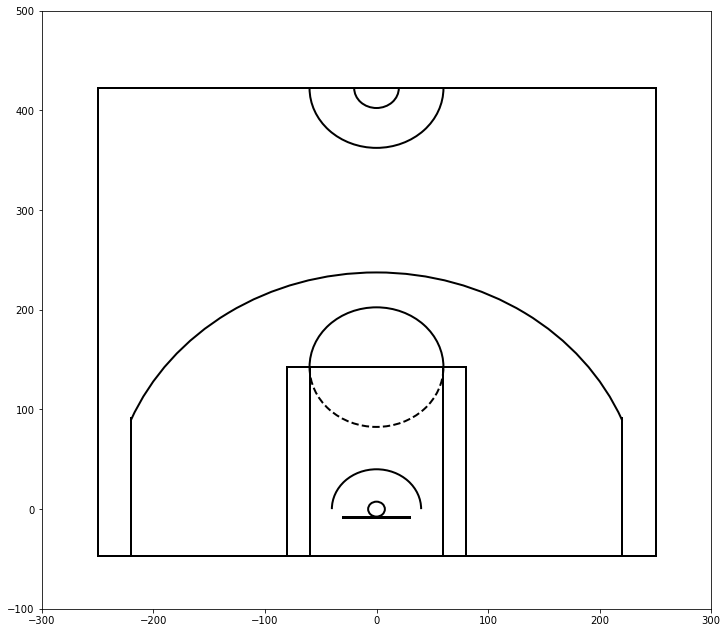

In [14]:
# Check court design, elements, and dimensions

plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

In [15]:
# Filter missed shots from Zion's shot chart

df_shot_make = shot_df[shot_df['SHOT_MADE_FLAG'] == 1]
df_shot_make.head(20)

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,POINTS
1,Shot Chart Detail,0022000441,49,1629627,Zion Williamson,1610612740,New Orleans Pelicans,1,7,26,...,Less Than 8 ft.,2,-22,-3,1,1,20210217,NOP,POR,2
2,Shot Chart Detail,0022000441,63,1629627,Zion Williamson,1610612740,New Orleans Pelicans,1,5,59,...,Less Than 8 ft.,1,-12,6,1,1,20210217,NOP,POR,2
3,Shot Chart Detail,0022000441,142,1629627,Zion Williamson,1610612740,New Orleans Pelicans,1,0,55,...,Less Than 8 ft.,0,0,0,1,1,20210217,NOP,POR,2
4,Shot Chart Detail,0022000441,164,1629627,Zion Williamson,1610612740,New Orleans Pelicans,2,10,40,...,Less Than 8 ft.,1,8,13,1,1,20210217,NOP,POR,2
5,Shot Chart Detail,0022000441,169,1629627,Zion Williamson,1610612740,New Orleans Pelicans,2,10,7,...,Less Than 8 ft.,1,6,18,1,1,20210217,NOP,POR,2
10,Shot Chart Detail,0022000441,364,1629627,Zion Williamson,1610612740,New Orleans Pelicans,3,7,38,...,Less Than 8 ft.,1,-6,10,1,1,20210217,NOP,POR,2
11,Shot Chart Detail,0022000441,373,1629627,Zion Williamson,1610612740,New Orleans Pelicans,3,6,53,...,Less Than 8 ft.,2,-29,3,1,1,20210217,NOP,POR,2
12,Shot Chart Detail,0022000441,376,1629627,Zion Williamson,1610612740,New Orleans Pelicans,3,6,19,...,24+ ft.,23,-239,11,1,1,20210217,NOP,POR,3
13,Shot Chart Detail,0022000441,492,1629627,Zion Williamson,1610612740,New Orleans Pelicans,4,11,40,...,Less Than 8 ft.,1,-16,0,1,1,20210217,NOP,POR,2
14,Shot Chart Detail,0022000441,515,1629627,Zion Williamson,1610612740,New Orleans Pelicans,4,9,13,...,Less Than 8 ft.,1,-15,-6,1,1,20210217,NOP,POR,2


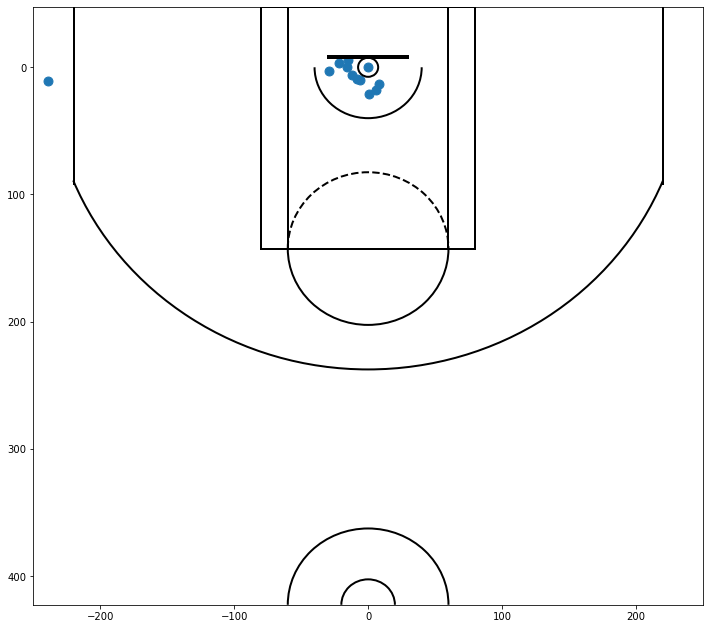

In [16]:
# Plot Zion's converted field goals

plt.figure(figsize=(12,11))
plt.scatter(df_shot_make.LOC_X, df_shot_make.LOC_Y, s=80)
draw_court()
# Adjust plot limits to just fit in half court
plt.xlim(-250,250)
# Descending values along th y axis from bottom to top
# in order to place the hoop by the top of plot
plt.ylim(422.5, -47.5)
# get rid of axis tick labels
# plt.tick_params(labelbottom=False, labelleft=False)
plt.show()

## 2. Dame scored & assisted on how many of Portland’s 126 points?

In [17]:
# Find Dame's player_id

players.find_players_by_first_name('damian')

[{'id': 1627745,
  'full_name': 'Damian Jones',
  'first_name': 'Damian',
  'last_name': 'Jones',
  'is_active': True},
 {'id': 203081,
  'full_name': 'Damian Lillard',
  'first_name': 'Damian',
  'last_name': 'Lillard',
  'is_active': True}]

In [18]:
from nba_api.stats.endpoints import playbyplayv2
pbp = playbyplayv2.PlayByPlayV2(game_id)
pbp = pbp.get_data_frames()[0]


display(pbp.head(20))

,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,...,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,VIDEO_AVAILABLE_FLAG
0,0022000441,2,12,0,1,9:11 PM,12:00,None,Start of 1st Period (9:11 PM EST),None,...,None,None,0,0,None,NaN,None,None,None,0
1,0022000441,4,10,0,1,9:11 PM,12:00,Jump Ball Adams vs. Kanter: Tip to Ball,None,None,...,Trail Blazers,POR,4,1628366,Lonzo Ball,1.610613e+09,New Orleans,Pelicans,NOP,1
2,0022000441,7,1,101,1,9:11 PM,11:46,Bledsoe 7' Driving Floating Jump Shot (2 PTS) ...,None,None,...,Pelicans,NOP,0,0,None,NaN,None,None,None,1
3,0022000441,9,5,45,1,9:11 PM,11:31,None,None,Jones Jr. Out of Bounds - Bad Pass Turnover Tu...,...,None,None,1,0,None,NaN,None,None,None,1
4,0022000441,10,2,1,1,9:12 PM,11:14,MISS Ingram 27' 3PT Jump Shot,None,None,...,None,None,0,0,None,NaN,None,None,None,1
5,0022000441,11,4,0,1,9:12 PM,11:09,None,None,Covington REBOUND (Off:0 Def:1),...,None,None,0,0,None,NaN,None,None,None,1
6,0022000441,12,1,98,1,9:12 PM,11:00,None,None,Kanter 2' Cutting Layup Shot (2 PTS) (Lillard ...,...,Trail Blazers,POR,0,0,None,NaN,None,None,None,1
7,0022000441,14,5,4,1,9:12 PM,10:54,Ball Traveling Turnover (P1.T1),None,None,...,None,None,1,0,None,NaN,None,None,None,1
8,0022000441,15,1,6,1,9:12 PM,10:41,None,None,Lillard 1' Driving Layup (2 PTS),...,None,None,0,0,None,NaN,None,None,None,1
9,0022000441,16,6,1,1,9:13 PM,10:27,None,None,Jones Jr. P.FOUL (P1.T1) (T.Brown),...,Pelicans,NOP,1,0,None,NaN,None,None,None,1


In [19]:
# Match Enum list for `EVENTMSGTYPE`

from enum import Enum

class EventMsgType(Enum):
    FIELD_GOAL_MADE = 1
    FIELD_GOAL_MISSED = 2
    FREE_THROW = 3
    REBOUND = 4
    TURNOVER = 5
    FOUL = 6
    VIOLATION = 7
    SUBSTITUTION = 8
    TIMEOUT = 9
    JUMP_BALL = 10
    EJECTION = 11
    PERIOD_BEGIN = 12
    PERIOD_END = 13
    UNKNOWN = 18

In [20]:
# Filter for only made shots and free throw attemps

pbp2 = pbp[(pbp['EVENTMSGTYPE'] == 1) | (pbp['EVENTMSGTYPE'] == 3)]

display(pbp2.head(10))

,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,...,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,VIDEO_AVAILABLE_FLAG
2,0022000441,7,1,101,1,9:11 PM,11:46,Bledsoe 7' Driving Floating Jump Shot (2 PTS) ...,None,None,...,Pelicans,NOP,0,0,None,NaN,None,None,None,1
6,0022000441,12,1,98,1,9:12 PM,11:00,None,None,Kanter 2' Cutting Layup Shot (2 PTS) (Lillard ...,...,Trail Blazers,POR,0,0,None,NaN,None,None,None,1
8,0022000441,15,1,6,1,9:12 PM,10:41,None,None,Lillard 1' Driving Layup (2 PTS),...,None,None,0,0,None,NaN,None,None,None,1
10,0022000441,18,1,79,1,9:13 PM,10:22,Ingram 16' Pullup Jump Shot (2 PTS),None,None,...,None,None,0,0,None,NaN,None,None,None,1
18,0022000441,28,1,6,1,9:14 PM,9:16,None,None,Trent Jr. 2' Driving Layup (2 PTS),...,None,None,0,0,None,NaN,None,None,None,1
21,0022000441,32,3,11,1,9:15 PM,8:30,None,None,Lillard Free Throw 1 of 2 (3 PTS),...,None,None,0,0,None,NaN,None,None,None,1
22,0022000441,33,3,12,1,9:16 PM,8:30,None,None,Lillard Free Throw 2 of 2 (4 PTS),...,None,None,0,0,None,NaN,None,None,None,1
23,0022000441,34,1,1,1,9:16 PM,8:19,Bledsoe 26' 3PT Jump Shot (5 PTS) (Williamson ...,None,None,...,Pelicans,NOP,0,0,None,NaN,None,None,None,1
24,0022000441,36,1,98,1,9:16 PM,8:04,None,None,Kanter 2' Cutting Layup Shot (4 PTS) (Lillard ...,...,Trail Blazers,POR,0,0,None,NaN,None,None,None,1
26,0022000441,40,3,11,1,9:17 PM,7:53,Ingram Free Throw 1 of 2 (3 PTS),None,None,...,None,None,0,0,None,NaN,None,None,None,1


In [21]:
# Filter for only Dame Points & Assists

pbp2 = pbp2[(pbp2['PLAYER1_NAME'] == "Damian Lillard") | (pbp2['PLAYER2_NAME'] == "Damian Lillard")]
pbp2.head()

from IPython.display import display
with pd.option_context('display.max_columns', None):
    display(pbp2.head(20)) 

,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,SCORE,SCOREMARGIN,PERSON1TYPE,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_ID,PLAYER1_TEAM_CITY,PLAYER1_TEAM_NICKNAME,PLAYER1_TEAM_ABBREVIATION,PERSON2TYPE,PLAYER2_ID,PLAYER2_NAME,PLAYER2_TEAM_ID,PLAYER2_TEAM_CITY,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,VIDEO_AVAILABLE_FLAG
6,0022000441,12,1,98,1,9:12 PM,11:00,None,None,Kanter 2' Cutting Layup Shot (2 PTS) (Lillard ...,2 - 2,TIE,5,202683,Enes Kanter,1.610613e+09,Portland,Trail Blazers,POR,5,203081,Damian Lillard,1.610613e+09,Portland,Trail Blazers,POR,0,0,None,NaN,None,None,None,1
8,0022000441,15,1,6,1,9:12 PM,10:41,None,None,Lillard 1' Driving Layup (2 PTS),4 - 2,-2,5,203081,Damian Lillard,1.610613e+09,Portland,Trail Blazers,POR,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1
21,0022000441,32,3,11,1,9:15 PM,8:30,None,None,Lillard Free Throw 1 of 2 (3 PTS),7 - 4,-3,5,203081,Damian Lillard,1.610613e+09,Portland,Trail Blazers,POR,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1
22,0022000441,33,3,12,1,9:16 PM,8:30,None,None,Lillard Free Throw 2 of 2 (4 PTS),8 - 4,-4,5,203081,Damian Lillard,1.610613e+09,Portland,Trail Blazers,POR,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1
24,0022000441,36,1,98,1,9:16 PM,8:04,None,None,Kanter 2' Cutting Layup Shot (4 PTS) (Lillard ...,10 - 7,-3,5,202683,Enes Kanter,1.610613e+09,Portland,Trail Blazers,POR,5,203081,Damian Lillard,1.610613e+09,Portland,Trail Blazers,POR,0,0,None,NaN,None,None,None,1
39,0022000441,56,1,1,1,9:22 PM,6:49,None,None,Lillard 26' 3PT Jump Shot (7 PTS) (Trent Jr. 1...,13 - 11,-2,5,203081,Damian Lillard,1.610613e+09,Portland,Trail Blazers,POR,5,1629018,Gary Trent Jr.,1.610613e+09,Portland,Trail Blazers,POR,0,0,None,NaN,None,None,None,1
42,0022000441,61,1,1,1,9:23 PM,6:19,None,None,Lillard 28' 3PT Jump Shot (10 PTS) (Jones Jr. ...,16 - 13,-3,5,203081,Damian Lillard,1.610613e+09,Portland,Trail Blazers,POR,5,1627884,Derrick Jones Jr.,1.610613e+09,Portland,Trail Blazers,POR,0,0,None,NaN,None,None,None,1
48,0022000441,70,1,52,1,9:24 PM,5:27,None,None,Jones Jr. Alley Oop Dunk (2 PTS) (Lillard 3 AST),18 - 15,-3,5,1627884,Derrick Jones Jr.,1.610613e+09,Portland,Trail Blazers,POR,5,203081,Damian Lillard,1.610613e+09,Portland,Trail Blazers,POR,0,0,None,NaN,None,None,None,1
50,0022000441,73,1,1,1,9:24 PM,5:04,None,None,Lillard 31' 3PT Jump Shot (13 PTS),21 - 17,-4,5,203081,Damian Lillard,1.610613e+09,Portland,Trail Blazers,POR,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1
59,0022000441,86,1,80,1,9:28 PM,4:16,None,None,Lillard 20' Step Back Jump Shot (15 PTS),25 - 17,-8,5,203081,Damian Lillard,1.610613e+09,Portland,Trail Blazers,POR,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1


In [22]:
# Assign values to made FGs

pbp2['FG_pts'] = np.where(pbp2.VISITORDESCRIPTION.str.contains("3PT"), 3, 
                          np.where(pbp2.VISITORDESCRIPTION.str.contains("Free Throw"), 0, 2))
                             
from IPython.display import display
with pd.option_context('display.max_columns', None):
    display(pbp2.head(10))  

,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,SCORE,SCOREMARGIN,PERSON1TYPE,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_ID,PLAYER1_TEAM_CITY,PLAYER1_TEAM_NICKNAME,PLAYER1_TEAM_ABBREVIATION,PERSON2TYPE,PLAYER2_ID,PLAYER2_NAME,PLAYER2_TEAM_ID,PLAYER2_TEAM_CITY,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,VIDEO_AVAILABLE_FLAG,FG_pts
6,0022000441,12,1,98,1,9:12 PM,11:00,None,None,Kanter 2' Cutting Layup Shot (2 PTS) (Lillard ...,2 - 2,TIE,5,202683,Enes Kanter,1.610613e+09,Portland,Trail Blazers,POR,5,203081,Damian Lillard,1.610613e+09,Portland,Trail Blazers,POR,0,0,None,NaN,None,None,None,1,2
8,0022000441,15,1,6,1,9:12 PM,10:41,None,None,Lillard 1' Driving Layup (2 PTS),4 - 2,-2,5,203081,Damian Lillard,1.610613e+09,Portland,Trail Blazers,POR,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1,2
21,0022000441,32,3,11,1,9:15 PM,8:30,None,None,Lillard Free Throw 1 of 2 (3 PTS),7 - 4,-3,5,203081,Damian Lillard,1.610613e+09,Portland,Trail Blazers,POR,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1,0
22,0022000441,33,3,12,1,9:16 PM,8:30,None,None,Lillard Free Throw 2 of 2 (4 PTS),8 - 4,-4,5,203081,Damian Lillard,1.610613e+09,Portland,Trail Blazers,POR,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1,0
24,0022000441,36,1,98,1,9:16 PM,8:04,None,None,Kanter 2' Cutting Layup Shot (4 PTS) (Lillard ...,10 - 7,-3,5,202683,Enes Kanter,1.610613e+09,Portland,Trail Blazers,POR,5,203081,Damian Lillard,1.610613e+09,Portland,Trail Blazers,POR,0,0,None,NaN,None,None,None,1,2
39,0022000441,56,1,1,1,9:22 PM,6:49,None,None,Lillard 26' 3PT Jump Shot (7 PTS) (Trent Jr. 1...,13 - 11,-2,5,203081,Damian Lillard,1.610613e+09,Portland,Trail Blazers,POR,5,1629018,Gary Trent Jr.,1.610613e+09,Portland,Trail Blazers,POR,0,0,None,NaN,None,None,None,1,3
42,0022000441,61,1,1,1,9:23 PM,6:19,None,None,Lillard 28' 3PT Jump Shot (10 PTS) (Jones Jr. ...,16 - 13,-3,5,203081,Damian Lillard,1.610613e+09,Portland,Trail Blazers,POR,5,1627884,Derrick Jones Jr.,1.610613e+09,Portland,Trail Blazers,POR,0,0,None,NaN,None,None,None,1,3
48,0022000441,70,1,52,1,9:24 PM,5:27,None,None,Jones Jr. Alley Oop Dunk (2 PTS) (Lillard 3 AST),18 - 15,-3,5,1627884,Derrick Jones Jr.,1.610613e+09,Portland,Trail Blazers,POR,5,203081,Damian Lillard,1.610613e+09,Portland,Trail Blazers,POR,0,0,None,NaN,None,None,None,1,2
50,0022000441,73,1,1,1,9:24 PM,5:04,None,None,Lillard 31' 3PT Jump Shot (13 PTS),21 - 17,-4,5,203081,Damian Lillard,1.610613e+09,Portland,Trail Blazers,POR,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1,3
59,0022000441,86,1,80,1,9:28 PM,4:16,None,None,Lillard 20' Step Back Jump Shot (15 PTS),25 - 17,-8,5,203081,Damian Lillard,1.610613e+09,Portland,Trail Blazers,POR,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1,2


In [23]:
# Assign values to made FTs

pbp2['FT_pts'] = np.where((pbp2['EVENTMSGTYPE'] == 3) & (pbp2.VISITORDESCRIPTION.str.contains("PTS")), 1, 0)

display(pbp2.head(10))

,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,...,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,VIDEO_AVAILABLE_FLAG,FG_pts,FT_pts
6,0022000441,12,1,98,1,9:12 PM,11:00,None,None,Kanter 2' Cutting Layup Shot (2 PTS) (Lillard ...,...,0,0,None,NaN,None,None,None,1,2,0
8,0022000441,15,1,6,1,9:12 PM,10:41,None,None,Lillard 1' Driving Layup (2 PTS),...,0,0,None,NaN,None,None,None,1,2,0
21,0022000441,32,3,11,1,9:15 PM,8:30,None,None,Lillard Free Throw 1 of 2 (3 PTS),...,0,0,None,NaN,None,None,None,1,0,1
22,0022000441,33,3,12,1,9:16 PM,8:30,None,None,Lillard Free Throw 2 of 2 (4 PTS),...,0,0,None,NaN,None,None,None,1,0,1
24,0022000441,36,1,98,1,9:16 PM,8:04,None,None,Kanter 2' Cutting Layup Shot (4 PTS) (Lillard ...,...,0,0,None,NaN,None,None,None,1,2,0
39,0022000441,56,1,1,1,9:22 PM,6:49,None,None,Lillard 26' 3PT Jump Shot (7 PTS) (Trent Jr. 1...,...,0,0,None,NaN,None,None,None,1,3,0
42,0022000441,61,1,1,1,9:23 PM,6:19,None,None,Lillard 28' 3PT Jump Shot (10 PTS) (Jones Jr. ...,...,0,0,None,NaN,None,None,None,1,3,0
48,0022000441,70,1,52,1,9:24 PM,5:27,None,None,Jones Jr. Alley Oop Dunk (2 PTS) (Lillard 3 AST),...,0,0,None,NaN,None,None,None,1,2,0
50,0022000441,73,1,1,1,9:24 PM,5:04,None,None,Lillard 31' 3PT Jump Shot (13 PTS),...,0,0,None,NaN,None,None,None,1,3,0
59,0022000441,86,1,80,1,9:28 PM,4:16,None,None,Lillard 20' Step Back Jump Shot (15 PTS),...,0,0,None,NaN,None,None,None,1,2,0


In [24]:
# New column totaling FG points & FT points

pbp2['pts'] = pbp2['FG_pts'] + pbp2['FT_pts']

In [25]:
pbp2['pts'].sum()

82

## Answer: Dame scored or assisted 82 of the Blazers 126 points

### Brief Check

In [26]:
# How many points did Dame score

pbp2.loc[pbp2['PLAYER1_NAME'] == "Damian Lillard", 'pts'].sum()

43

In [27]:
# How many free throws did Dame score

pbp2['FT_pts'].sum() 

8

In [28]:
# How many points were scored off Dame assists

pbp2.loc[pbp2['PLAYER2_NAME'] == "Damian Lillard", 'pts'].sum()

39